In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ToyotaCorolla.csv")
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


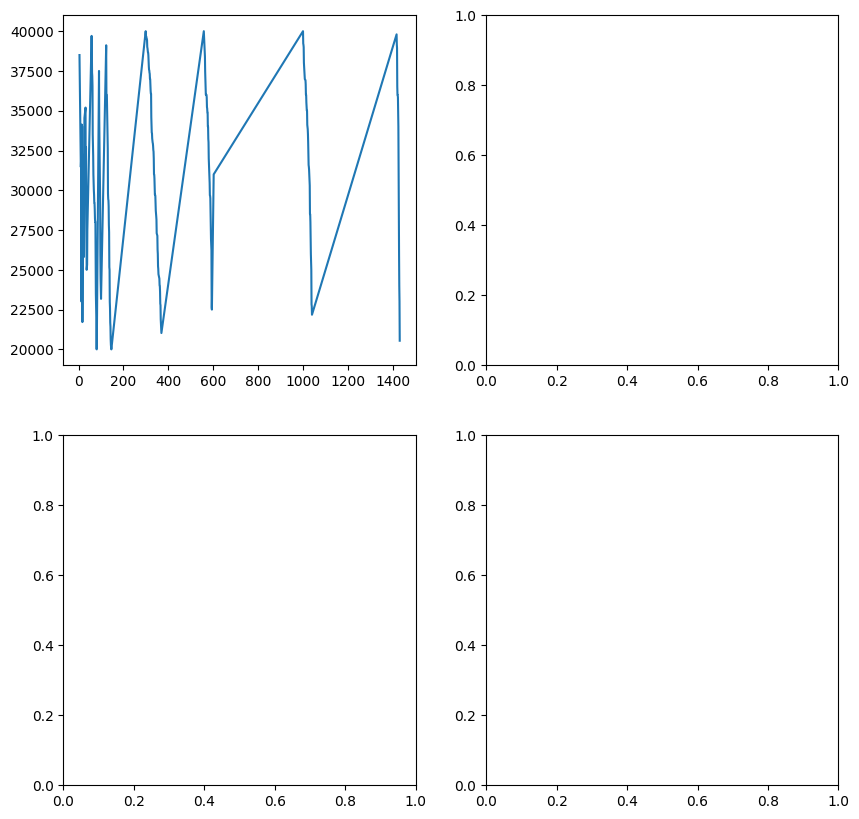

In [3]:
fig , axes = plt.subplots(2,2, figsize = (10,10))

km_r = df[(df['KM'] >= 20000) & (df['KM'] <= 40000) ]
axes[0,0].plot(km_r["KM"])

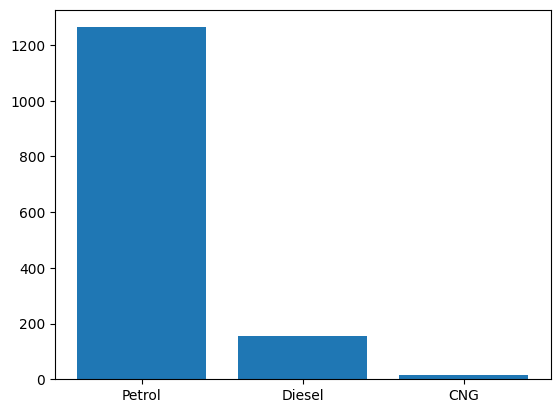

In [4]:
fuel_types = df['Fuel_Type'].value_counts()
plt.figure()
plt.bar(fuel_types.index , fuel_types.values)
plt.show()

In [5]:
# Load your datasets as DataFrames (replace "dataset.csv" with actual file names)
toyota_df = pd.read_csv("ToyotaCorolla.csv")
fifa_df = pd.read_csv("fifa.csv")
flightdelays_df = pd.read_csv("flight_delays.csv")
candy_df = pd.read_csv("candy.csv")

In [6]:
print(toyota_df['KM'].std())

37506.44887218956


In [7]:
from scipy import stats
import seaborn as sns

26.0
3500.0
44020.75
0      -0.574695
1       0.117454
2      -0.715386
3      -0.547650
4      -0.801028
          ...   
1431   -1.279939
1432   -1.321120
1433   -1.374036
1434   -1.376703
1435   -1.827849
Name: KM, Length: 1436, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

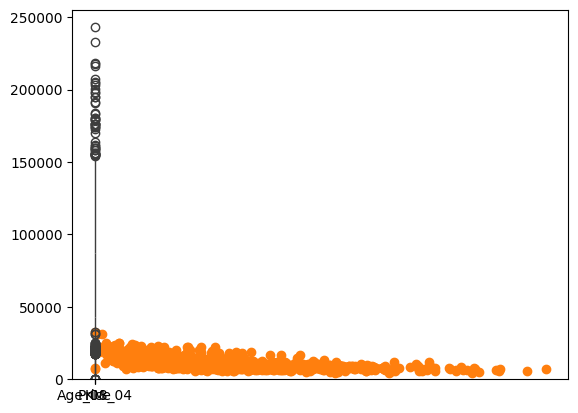

In [8]:
sample_columns = ['Age_08_04', 'Price', 'KM']

for i in sample_columns:
    q1 = toyota_df[i].quantile(0.25)
    q3 = toyota_df[i].quantile(0.75)
    IQR = q3 - q1
    print (IQR)
    
z_score = stats.zscore(toyota_df['KM'].dropna())
print(z_score)

plt.figure()
sns.boxplot(data = toyota_df[sample_columns])
plt.scatter(toyota_df['KM'] , toyota_df['Price'])
plt.hist(toyota_df['KM'])
plt.show

In [9]:
# 5.5 Inferential Statistics - Point estimate

In [10]:
df1=pd.read_csv("Heart.csv")

In [11]:
df1['Age'].mean()

54.43894389438944

In [12]:
pop = df1['Age']
sample = np.random.choice(a= pop, size = 200)
print(sample.mean())

df1['Age'].mean() - sample.mean()

52.555


1.8839438943894393

In [13]:
pe = []

for i in range (5):
    sample2 = np.random.choice(a=pop, size =50)
    pe.append(sample2.mean())
print(df1['Age'].mean())
print(np.array(pe).mean())

54.43894389438944
55.455999999999996


In [14]:
import math
import scipy.stats as stats

pop2 = df1['Age']
sample_size = 50
sample2 = np.random.choice(a= pop2, size = sample_size)
sample_mean = sample2.mean()

z_critical = stats.norm.ppf(q = 0.975)

pop2_std = pop2.std()

mof = z_critical * (pop2_std / math.sqrt(sample_size))

confidance = (sample_mean - mof , sample_mean  + mof)
print(confidance)

(52.41465663080145, 57.42534336919855)


In [18]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
X_train , X_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('train_labels', y_train.shape)
print('test_labels', y_test.shape)


X_train (1148, 36)
X_test (288, 36)
train_labels (1148,)
test_labels (288,)


In [ ]:
reg = LinearRegression()
reg.fit(X_train ,y_train)
print(reg.coef_)
print(reg.intercept_)